In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Regression_Container





In [2]:
# Load Boston model

Boston_Data = BB_Model('Boston')

Boston_Data.df().head()

,crime_rate,zoned_lots,industry,by_river,NOX,avg_rooms,pre_1940,emp_distance,rad_access,tax_rate,pupil_tea_rat,low_status,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
Boston_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6657443787940345


MLPRegressor(random_state=RandomState(MT19937) at 0x2281CCB1C40)

In [4]:
Boston_Data.Random_Forest()

0.8724764656989308


RandomForestRegressor(random_state=RandomState(MT19937) at 0x2281CCB1C40)

In [5]:
print(Boston_Data.get_features())

['crime_rate', 'zoned_lots', 'industry', 'by_river', 'NOX', 'avg_rooms', 'pre_1940', 'emp_distance', 'rad_access', 'tax_rate', 'pupil_tea_rat', 'low_status']


In [6]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()

#Initializing the explainer object
Unravel_Exp = UnRAVELTabularExplainer(bbox_model           = Boston_Data.get_Random_Forest(),
                                      train_data           = X_train,
                                      categorical_features = Boston_Data.get_catagorical(),
                                      mode                 = Boston_Data.get_mode())       


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [7]:
# Generate explantion data for Random Forest

Boston_Stats = Feature_Statistics(feature_names = Boston_Data.get_features(), mode = Boston_Data.get_mode())

for test_instance in range(20):#X_test.shape[0]):

    data_row  = np.array([X_test[test_instance]])
    
    explain_inst = Unravel_Exp.explain(X_init            = data_row,
                                       feature_names     = Boston_Data.get_features(),
                                       alpha             = "FUR",
                                       max_iter          = 20,
                                       normalize         = False,
                                       importance_method = "ARD")
       
    f_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.gpmodel_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    
    print('INSTANCE: ', test_instance)
       
    Boston_Stats.Add_Sample(sample       = data_row,
                            outcome      = y_test[test_instance],
                            f_prediction = f_predict,
                            e_prediction = e_predict)
    

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19


In [8]:
Boston_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

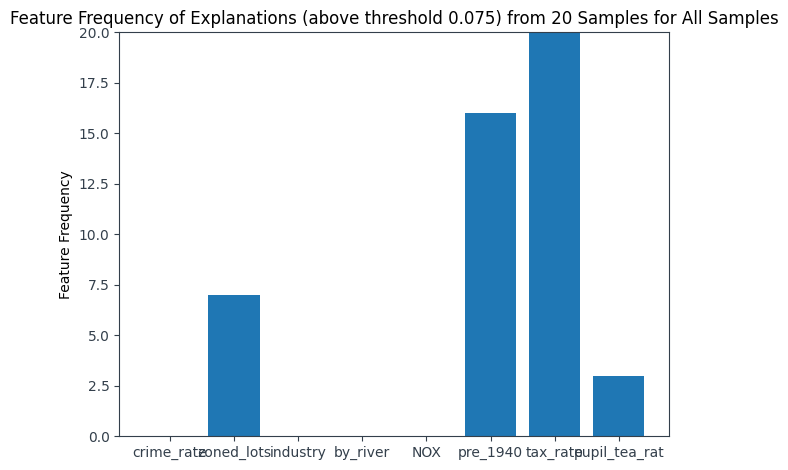

In [9]:
Boston_Stats.Frequency_Plot()

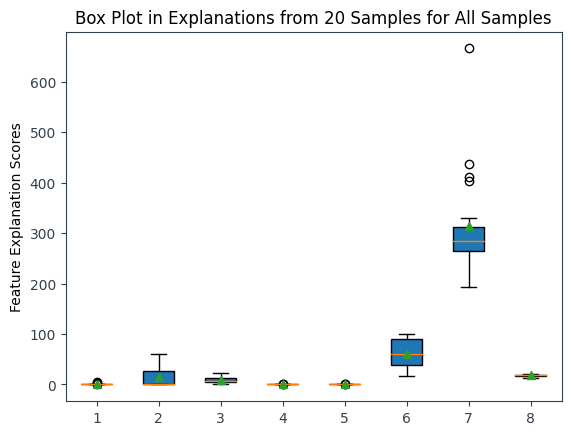

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      pre_1940
7 -      tax_rate
8 -      pupil_tea_rat


In [10]:
Boston_Stats.Box_Plot()

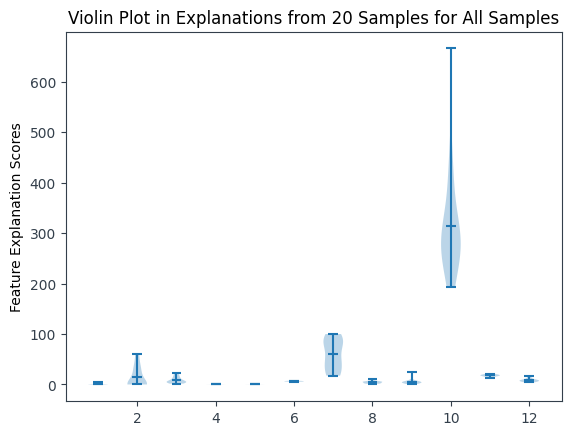

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      avg_rooms
7 -      pre_1940
8 -      emp_distance
9 -      rad_access
10 -     tax_rate
11 -     pupil_tea_rat
12 -     low_status


In [11]:
Boston_Stats.Violin_Plot(top_features=False)

In [12]:
Boston_Container = Regression_Container(Boston_Stats, 5)

Boston_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.05)


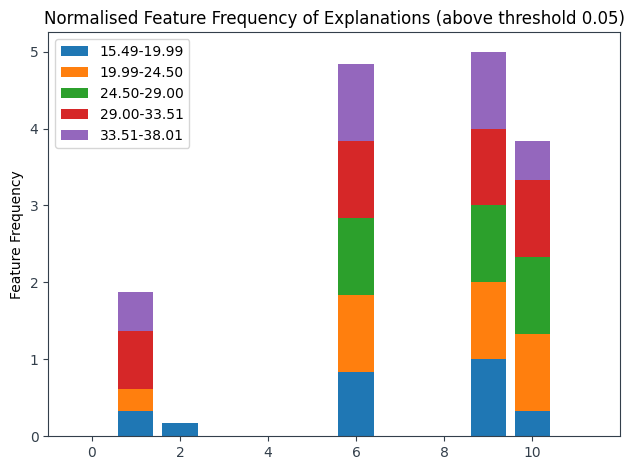

0 -      crime_rate
1 -      zoned_lots
2 -      industry
3 -      by_river
4 -      NOX
5 -      avg_rooms
6 -      pre_1940
7 -      emp_distance
8 -      rad_access
9 -     tax_rate
10 -     pupil_tea_rat
11 -     low_status


In [13]:
Boston_Container.Frequency_Plot()

In [14]:
Boston_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           1.4510000000000027  :  1.2577906000000074  :  3.5770000000000124
y - exp(x):          25.270371092139733  :  45.9901442636664  :  39.67936300339536
BB(x) - exp(x):      25.30907109213974  :  39.77980502430539  :  37.78036300339537
Average exp(x) var:  0.005158262517292402


In [15]:
Boston_Stats.Jaccard_Values()

Mean Jaccard Similarity:  0.6463659147869675
Mean Jaccard Distance:    0.35363408521303263


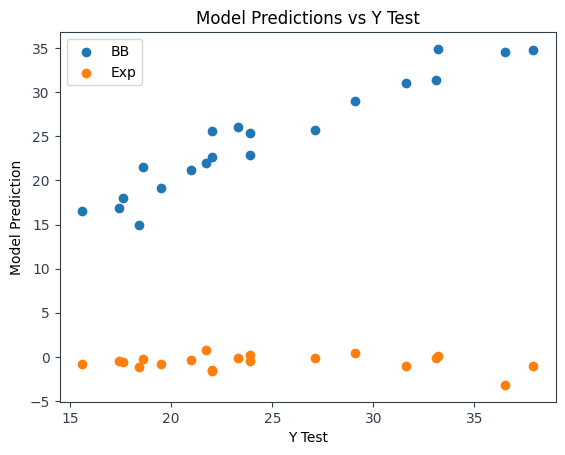

In [16]:
Boston_Stats.Reg_Fidelity_Graph()